<a href="https://colab.research.google.com/github/viola2002/2025_DeepLearning_for_AI/blob/main/0403_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

np.int64(1)

In [ ]:
[max(sequence) for sequence in train_data]

[7486,
 9837,
 6905,
 9941,
 7224,
 7982,
 9363,
 9820,
 7612,
 8419,
 8914,
 7412,
 9667,
 9106,
 6640,
 9671,
 9263,
 9935,
 8742,
 9580,
 9859,
 8793,
 7609,
 9462,
 9075,
 8614,
 8887,
 5898,
 9637,
 9212,
 9771,
 9209,
 8257,
 7778,
 9877,
 9753,
 7015,
 9902,
 8427,
 8867,
 8406,
 9579,
 9529,
 7056,
 7023,
 9922,
 5811,
 9124,
 9910,
 8795,
 7799,
 7146,
 9978,
 7999,
 9565,
 9731,
 9095,
 9888,
 5247,
 9655,
 4852,
 9939,
 9018,
 9885,
 7239,
 9636,
 9389,
 9561,
 9673,
 9147,
 9956,
 9448,
 8520,
 9360,
 9765,
 9025,
 9928,
 8352,
 9960,
 7320,
 8318,
 7881,
 9715,
 9851,
 9266,
 9055,
 8894,
 9719,
 9271,
 7311,
 8791,
 9918,
 9486,
 9867,
 9283,
 7707,
 9133,
 9055,
 9978,
 8013,
 8448,
 8700,
 9906,
 7517,
 9962,
 6266,
 6903,
 9815,
 9976,
 9273,
 9413,
 8931,
 8631,
 9685,
 9419,
 9964,
 7361,
 9052,
 9482,
 9643,
 9865,
 9819,
 7181,
 2775,
 9709,
 9977,
 8916,
 4431,
 9700,
 6532,
 8836,
 9926,
 6781,
 7614,
 5418,
 8881,
 9841,
 9615,
 9072,
 9831,
 6891,
 8827,
 9019,

In [ ]:
max([max(sequence) for sequence in train_data])

9999

⚡Be familiar to **list comprehension**

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) #reverse keys and values
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# check key-values pairs
for (keys, values) in word_index.items():
  print(f'{keys} : {values}')

Streaming output truncated to the last 5000 lines.
'face : 51348
morel's : 86485
recites : 21109
gassy : 86487
armpits : 51349
deformed : 10032
androgynous : 30391
citra : 86488
quivers : 86489
presto : 23495
'animal : 76646
excitedly : 36812
bites : 8415
biter : 27495
claim : 2305
stayin' : 86490
amalio : 51351
rottentomatoes : 40479
mugur : 51352
uruguay : 40480
agent : 1541
meneses : 86491
negulesco : 86492
flamboyance : 27496
'kid' : 86493
brontes : 51353
excpet : 71187
clair : 13858
woopie : 51354
recited : 40481
yashpal : 86494
whisperish : 86495
nyu : 40482
churlishly : 51355
idia : 76709
africa' : 86497
nye : 34465
vambo : 86498
staying : 4007
altioklar : 51356
accessory : 30392
a'vuchella : 58725
sputnick : 51357
aisles : 25132
agustí : 51358
piloted : 30393
joanie's : 51359
omen : 5118
kong's : 23656
holdouts : 86499
'george' : 86500
instills : 30394
switch : 4413
african : 2042
procuror : 65621
hilarities : 86501
meyerling's : 48428
undoing : 19444
development' : 86502
eniem

In [ ]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
x_val.shape

(10000, 10000)

In [ ]:
partial_x_train.shape

(15000, 10000)

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.6532 - loss: 0.6351 - val_accuracy: 0.8218 - val_loss: 0.4694
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8776 - loss: 0.4026 - val_accuracy: 0.8705 - val_loss: 0.3556
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9094 - loss: 0.2920 - val_accuracy: 0.8864 - val_loss: 0.2992
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9252 - loss: 0.2307 - val_accuracy: 0.8901 - val_loss: 0.2796
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9357 - loss: 0.1878 - val_accuracy: 0.8888 - val_loss: 0.2741
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9506 - loss: 0.1577 - val_accuracy: 0.8865 - val_loss: 0.2795
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9610 - loss: 0.1336 - val_accuracy: 0.8859 - val_loss: 0.2884
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9679 - loss: 0.1156 - val_accuracy: 0.8861 - 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

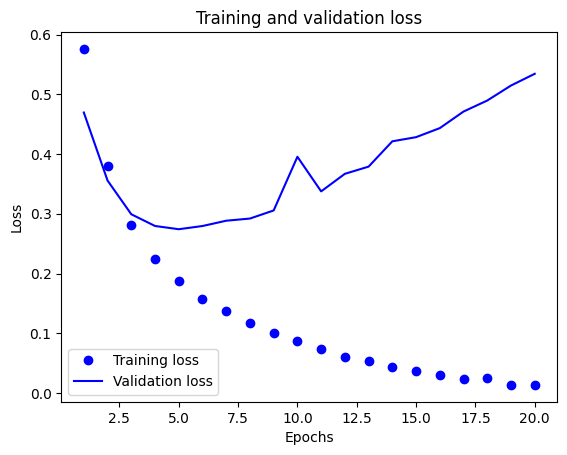

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

train loss always decreases because we update weights.
validation loss increases when overfitting occurs.

**Plotting the training and validation accuracy**

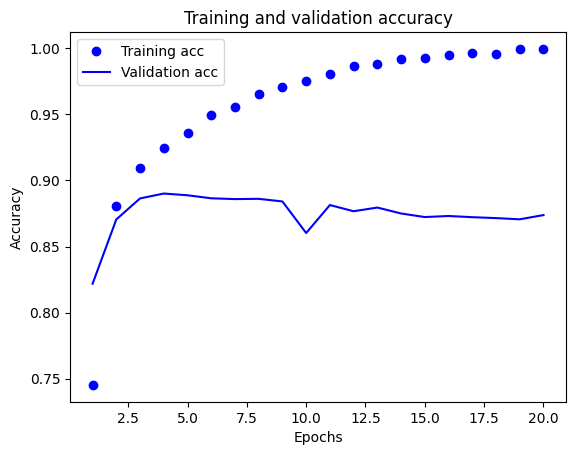

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7284 - loss: 0.5687
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9036 - loss: 0.2861
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9221 - loss: 0.2175
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9389 - loss: 0.1761
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8818 - loss: 0.2901


In [ ]:
results

[0.2869482636451721, 0.8843600153923035]

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.217087  ],
       [0.9997025 ],
       [0.8737552 ],
       ...,
       [0.0903322 ],
       [0.09222966],
       [0.66953   ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [ ]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
train_labels[10]

np.int64(3)

### Preparing the data

**Encoding the input data**

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
print(train_labels[:5])
print(y_train[:5,:])

[3 4 3 4 4]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
print(train_labels[:5])
print(y_train[:5,:])

[3 4 3 4 4]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Building your model

**Model definition**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.3779 - loss: 3.2734 - val_accuracy: 0.6380 - val_loss: 1.9318
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6633 - loss: 1.7202 - val_accuracy: 0.6900 - val_loss: 1.3919
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7189 - loss: 1.2355 - val_accuracy: 0.7310 - val_loss: 1.1770
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7830 - loss: 0.9835 - val_accuracy: 0.7500 - val_loss: 1.0770
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8203 - loss: 0.8281 - val_accuracy: 0.7820 - val_loss: 0.9946
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8509 - loss: 0.6860 - val_accuracy: 0.7980 - val_loss: 0.9537
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.8789 - loss: 0.5786 - val_accuracy: 0.8060 - val_loss: 0.9183
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8975 - loss: 0.4836 - val_accuracy: 0.8180 - v

**Plotting the training and validation loss**

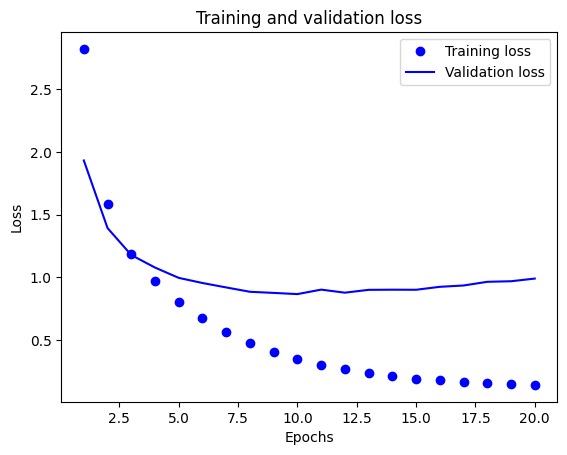

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

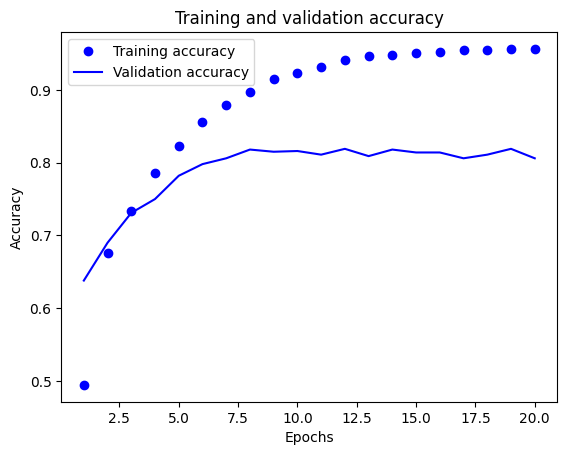

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4101 - loss: 3.0845
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6636 - loss: 1.5468
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7448 - loss: 1.1817
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7936 - loss: 0.9747
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8311 - loss: 0.7823
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8671 - loss: 0.6407
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.8818 - loss: 0.5591
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9114 - loss: 0.4450
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9200 - loss: 0.3894
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7897 - loss: 0.9492


In [ ]:
results

[0.9617940783500671, 0.780053436756134]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

np.float64(0.18967052537845058)

In [ ]:
x_train_1 = vectorize_sequences(train_data)
x_test_1 = vectorize_sequences(test_data)

In [ ]:
print(x_train_1[:5])
print(x_test_1[:5])

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
# we have to remove this process

In [ ]:
print(train_labels[:5])
print(test_labels[:5])

[3 4 3 4 4]
[ 3 10  1  4  4]


In [ ]:
print(train_labels[:5])
print(y_train[:5,:])

[3 4 3 4 4]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Building your model

**Model definition**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.3779 - loss: 3.2734 - val_accuracy: 0.6380 - val_loss: 1.9318
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6633 - loss: 1.7202 - val_accuracy: 0.6900 - val_loss: 1.3919
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7189 - loss: 1.2355 - val_accuracy: 0.7310 - val_loss: 1.1770
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7830 - loss: 0.9835 - val_accuracy: 0.7500 - val_loss: 1.0770
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8203 - loss: 0.8281 - val_accuracy: 0.7820 - val_loss: 0.9946
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8509 - loss: 0.6860 - val_accuracy: 0.7980 - val_loss: 0.9537
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.8789 - loss: 0.5786 - val_accuracy: 0.8060 - val_loss: 0.9183
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8975 - loss: 0.4836 - val_accuracy: 0.8180 - v

**Plotting the training and validation loss**

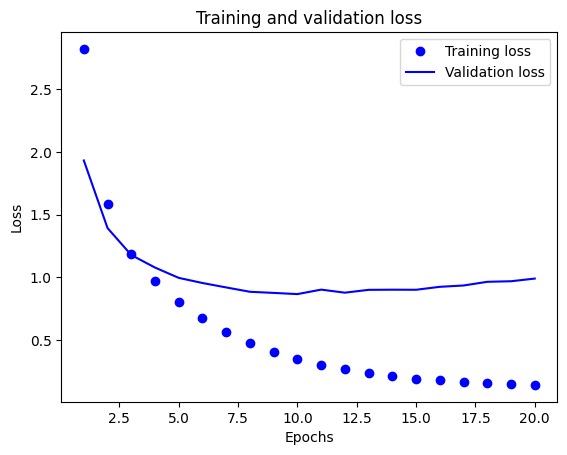

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

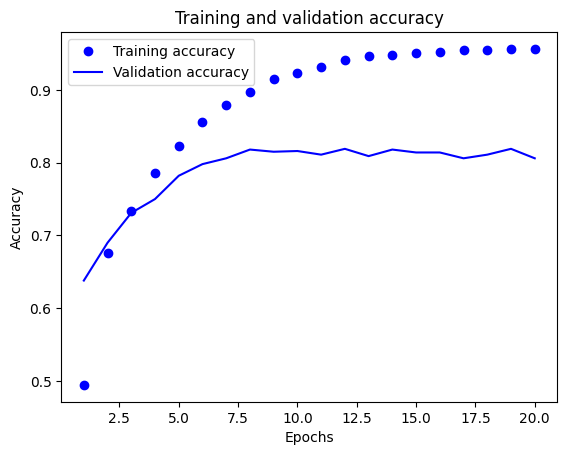

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0].shape

In [ ]:
np.sum(predictions[0])

In [ ]:
np.argmax(predictions[0])

### A different way to handle the labels and the loss

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(
        optimizer="rmsprop",
        loss="mse",
        metrics=["mae"]
        )
    return model

- Q. loss VS metric(mae)
  - loss should be differentiable
  - we just monitor metric, do not use to calculate the loss
- `loss="mse"`: `mse` stands for **Mean Squared Error**, which is the loss function used to measure the difference between the model's predictions and the actual target values. In regression tasks, minimizing MSE is a common goal.
- `metrics=["mae"]`: `mae` stands for **Mean Absolute Error**. It's an additional metric used to evaluate the model's performance, providing a different perspective on the prediction errors.

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
k = 4 #assign the value 4 to the variable k

num_val_samples = len(train_data) // k
num_epochs = 100

i=0
print(i*num_val_samples, (i+1)*num_val_samples)

0 101


- `len(train_data)` gets the total number of training samples.
- `// k` divides the total number of samples by `k` (which is 4) and performs **floor division** (discarding any remainder) to ensure an even split of the data.
- The result is stored in `num_val_samples`, representing the number of samples in each validation fold (one-fourth of the total training data in this case).

In [ ]:
i=1
print(i*num_val_samples, (i+1)*num_val_samples)

101 202


In [ ]:
i=2
print(i*num_val_samples, (i+1)*num_val_samples)

202 303


In [ ]:
# because we do not exercise previous codes (IMDB, Reuters)

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) #evaluates the model on the validation data
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


- `val_data` and `val_targets`: These lines select a portion of the data (`train_data` and `train_targets`) to be used as the validation set for the current fold. The slicing is done to select one of the `k` folds.
- `partial_train_data` and `partial_train_targets`: These lines use `np.concatenate` to combine the remaining data (excluding the validation set) to be used for training the model in the current fold.
- `verbose=0` suppresses the training output.

-> 이 코드에서는 history를 저장하지 않음

In [ ]:
all_scores

[1.9051090478897095, 2.465998649597168, 2.5224974155426025, 2.3892478942871094]

In [ ]:
np.mean(all_scores)

np.float64(2.3207132518291473)

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
len(all_mae_histories)

4

In [ ]:
len(all_mae_histories[0])

500

**Building the history of successive mean K-fold validation scores**

In [ ]:
all_mae_histories

[[17.979347229003906,
  14.187992095947266,
  9.641729354858398,
  5.670273780822754,
  4.380265235900879,
  3.933724880218506,
  3.757366895675659,
  3.403606414794922,
  3.231419324874878,
  3.019495964050293,
  2.8438799381256104,
  2.754040479660034,
  2.8391125202178955,
  2.5961124897003174,
  2.649834394454956,
  2.5203495025634766,
  2.5134432315826416,
  2.4159696102142334,
  2.3198277950286865,
  2.2795135974884033,
  2.251138687133789,
  2.2824182510375977,
  2.227790355682373,
  2.2707128524780273,
  2.364635467529297,
  2.0691983699798584,
  2.188169002532959,
  2.192841053009033,
  2.2496337890625,
  2.167147636413574,
  2.1186423301696777,
  2.1972663402557373,
  2.1852364540100098,
  2.198800563812256,
  2.0608043670654297,
  1.9797269105911255,
  2.1116912364959717,
  2.050595760345459,
  1.974380612373352,
  1.9904078245162964,
  1.94879150390625,
  1.9988640546798706,
  1.9561020135879517,
  1.9553370475769043,
  1.9524602890014648,
  1.931760311126709,
  1.909950375

In [ ]:
[x[0] for x in all_mae_histories]

[17.979347229003906,
 20.034584045410156,
 18.696908950805664,
 20.525800704956055]

In [ ]:
np.mean([x[0] for x in all_mae_histories])

np.float64(19.309160232543945)

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
average_mae_history

[np.float64(19.309160232543945),
 np.float64(15.942182779312134),
 np.float64(11.834386348724365),
 np.float64(8.138561964035034),
 np.float64(5.950585246086121),
 np.float64(4.813326835632324),
 np.float64(4.274798810482025),
 np.float64(3.8935413360595703),
 np.float64(3.6249768137931824),
 np.float64(3.427609920501709),
 np.float64(3.2690387964248657),
 np.float64(3.20500111579895),
 np.float64(3.1487141251564026),
 np.float64(3.013350486755371),
 np.float64(3.0149537920951843),
 np.float64(2.894665479660034),
 np.float64(2.8855981826782227),
 np.float64(2.815536141395569),
 np.float64(2.785226583480835),
 np.float64(2.7726728916168213),
 np.float64(2.697752833366394),
 np.float64(2.7622074484825134),
 np.float64(2.6769795417785645),
 np.float64(2.7089684009552),
 np.float64(2.707099735736847),
 np.float64(2.6435755491256714),
 np.float64(2.6822423934936523),
 np.float64(2.654331088066101),
 np.float64(2.621108591556549),
 np.float64(2.65313982963562),
 np.float64(2.6270769834518433

**Plotting validation scores**

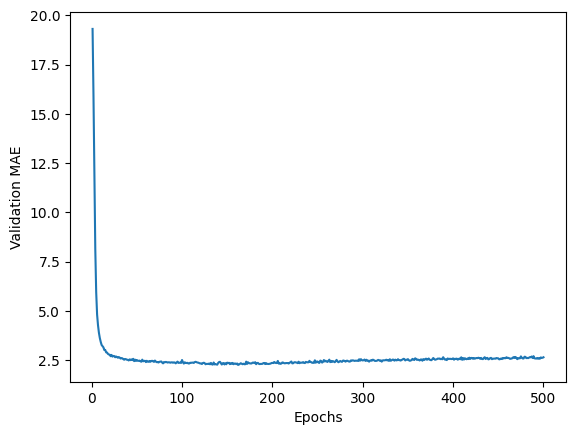

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

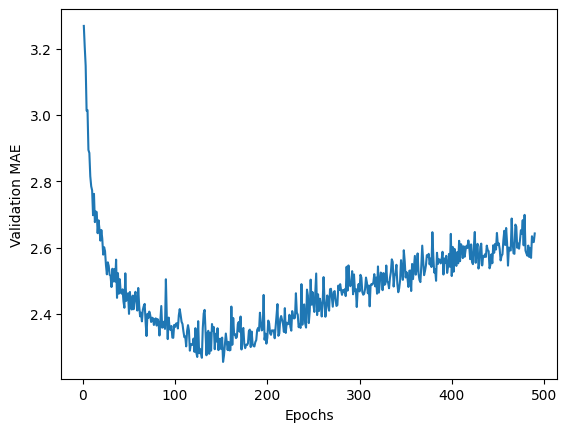

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 10.6730 - mae: 2.3288


In [ ]:
test_mae_score

2.5659613609313965

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([8.570053], dtype=float32)

### Wrapping up

## ⚓
**Try varying the number of layers in the model**

### Building your model

**Model definition**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(
        optimizer="rmsprop",
        loss="mse",
        metrics=["mae"]
        )
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) #evaluates the model on the validation data
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

## Summary